# Problem Set 4: Harris, SIFT, RANSAC

In [3]:
# Imports
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib.patches import ConnectionPatch
from scipy import ndimage
# Matplotlib params
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## 1. Harris corners
### 1.1 Image Gradients

In [4]:
# calculate gradient 
def grad_x(img, normalize = False):
    '''
    Calculate gradient in x direction
    '''
    kernel = np.array(([-2, 0, 2], [-7, 0, 7], [-2, 0, 2]))
    grad_img_x = cv.filter2D(img, -1, kernel)

    if normalize:
        grad_img_x = grad_img_x / np.max(grad_img_x)
    return grad_img_x


def grad_y(img, normalize = False):
    '''
    Calculate gradient in y direction
    '''
    kernel = np.array(([-2, -5, -2], [0, 0, 0], [2, 5, 2]))
    grad_img_y = cv.filter2D(img, -1, kernel)

    if normalize:
        grad_img_y = grad_img_y / np.max(grad_img_y)
    return grad_img_y

def plot(img1, img2, title1, title2):
    '''
    Plot images pairs
    '''
    fig, ax = plt.subplots(1, 2)

    ax[0].imshow(img1)
    ax[0].set_title(title1)
    ax[1].imshow(img2)  
    ax[1].set_title(title2)
    
    plt.show()


#### a.Translation Pair

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


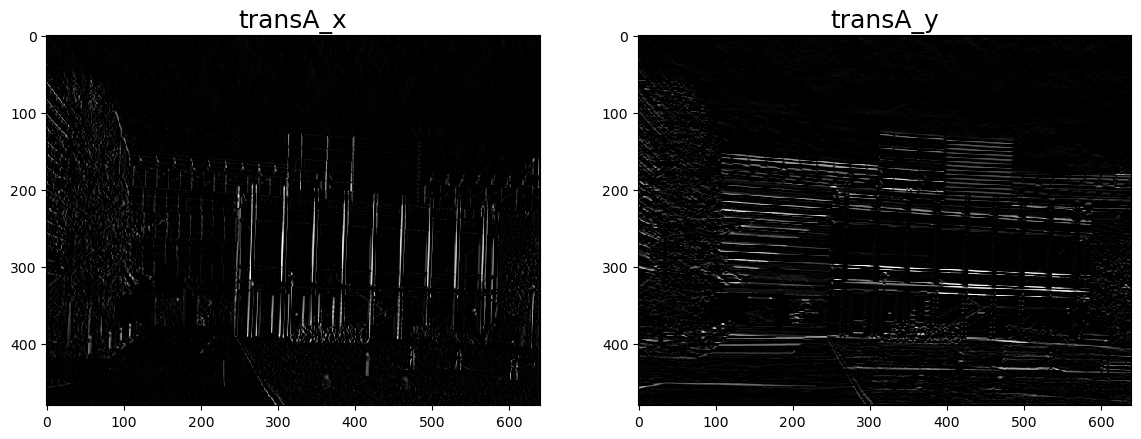

In [5]:
# Load image and convert to grayscale
transA = cv.imread('transA.jpg')
trans_A = transA.astype(np.float32) / 255
transB = cv.imread('transB.jpg')
trans_B = transB.astype(np.float32) / 255

# Calculate gradient images
trans_A_x = grad_x(trans_A, normalize = True)
trans_A_y = grad_y(trans_A, normalize = True)

# Plot gradient images
plot(trans_A_x, trans_A_y, 'transA_x', 'transA_y')

#### b. Similarity Transformation Pair

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


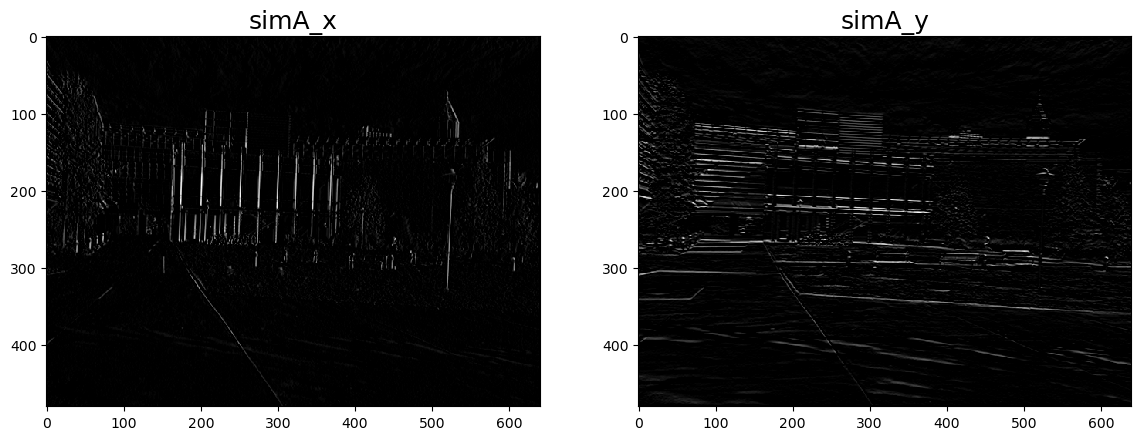

In [6]:
# Load image and convert to grayscale
simA = cv.imread('simA.jpg')
sim_A = simA.astype(np.float32) / 255
simB = cv.imread('simB.jpg')
sim_B = simB.astype(np.float32) / 255

# Calculate gradient images
sim_A_x = grad_x(sim_A, normalize = True)
sim_A_y = grad_y(sim_A, normalize = True)

# Plot gradient images
plot(sim_A_x, sim_A_y, 'simA_x', 'simA_y')

### 1.2 Harris Values

In [7]:
def harris_values(img, alpha = 0.06):
    '''calculate harris values'''
    # Calculate gradients
    grad_img_x = grad_x(img)
    grad_img_y = grad_y(img)
    #calculate Moments of the gradients
    Ixx = grad_img_x ** 2
    Iyy = grad_img_y ** 2
    Ixy = grad_img_x * grad_img_y
    # Calculate sum of squares
    Ixx = ndimage.gaussian_filter(Ixx, sigma = 0.8)
    Iyy = ndimage.gaussian_filter(Iyy, sigma = 0.8)
    Ixy = ndimage.gaussian_filter(Ixy, sigma = 0.8)
    # Calculate determinant and trace
    det = Ixx * Iyy - Ixy ** 2
    trace = Ixx + Iyy
    # Calculate harris values
    harris = det - alpha * trace ** 2
    return harris

#### a. Translation Pair

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


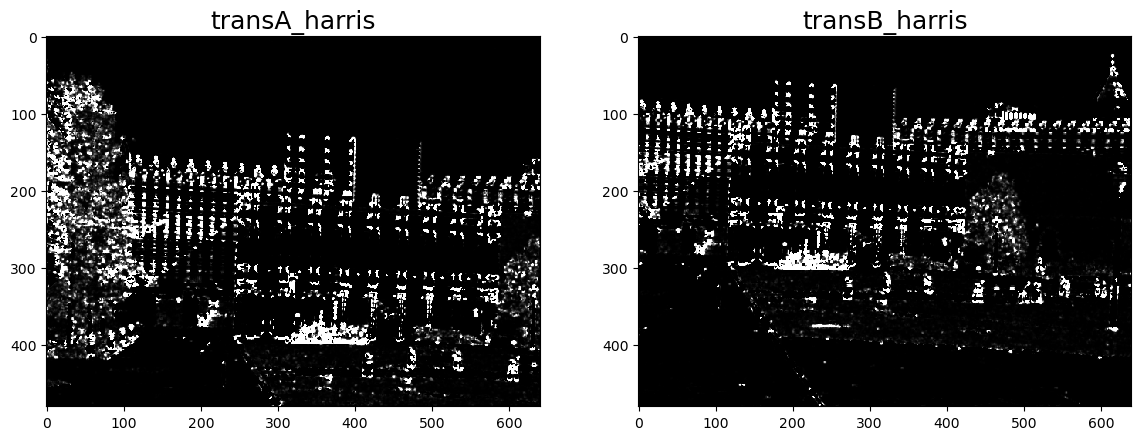

In [8]:
trans_A_hv = harris_values(trans_A)
trans_B_hv = harris_values(trans_B)
plot(trans_A_hv, trans_B_hv, 'transA_harris', 'transB_harris')
#print(trans_A_hv)


#### b.Similarity Piar

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


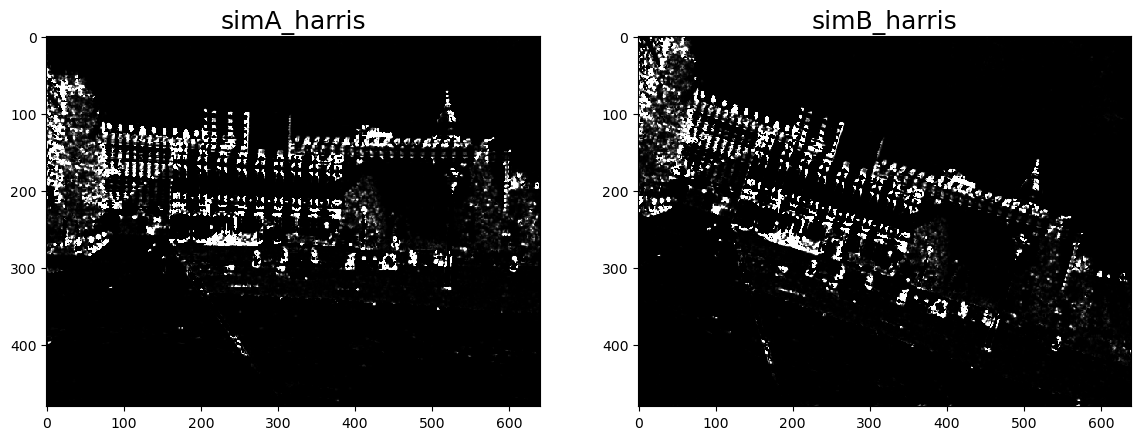

In [9]:
sim_A_hv = harris_values(sim_A)
sim_B_hv = harris_values(sim_B)
plot(sim_A_hv, sim_B_hv, 'simA_harris', 'simB_harris')

### 1.3 Find corners

In [10]:
def corners(hv, threshold = 7):
    #print
    #print(hv)
    #Thresholding
    mask = hv > threshold
    #print(mask)
    hv_thresh = np.copy(hv)
    hv_thresh[~mask] = 0

    # Non-maximum suppression
    local_max = ndimage.maximum_filter(hv_thresh, size = 20)
    mask_local_max = (hv == local_max) 
    background = (hv == 0)

    mask_local_max = mask_local_max ^ background
    corners = np.nonzero(mask_local_max)
    
    return corners

#### a. Translation Pair

(480, 640, 3)
3


Text(0.5, 1.0, 'transB corners')

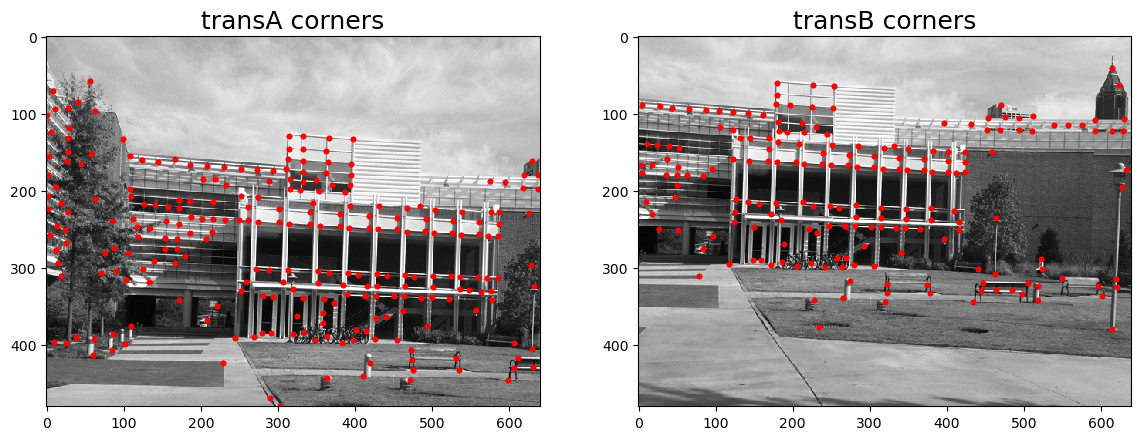

In [11]:
trans_A_hc = corners(trans_A_hv)
print(trans_A_hv.shape)
print(len(trans_A_hc))
trans_B_hc = corners(trans_B_hv)

# Plot corners
fig, ax = plt.subplots(1, 2)
ax[0].imshow(trans_A)
ax[0].plot(trans_A_hc[1], trans_A_hc[0], 'r.')
ax[0].set_title('transA corners')

ax[1].imshow(trans_B)
ax[1].plot(trans_B_hc[1], trans_B_hc[0], 'r.')  
ax[1].set_title('transB corners')



#### b.Similarity Pair

Text(0.5, 1.0, 'simB corners')

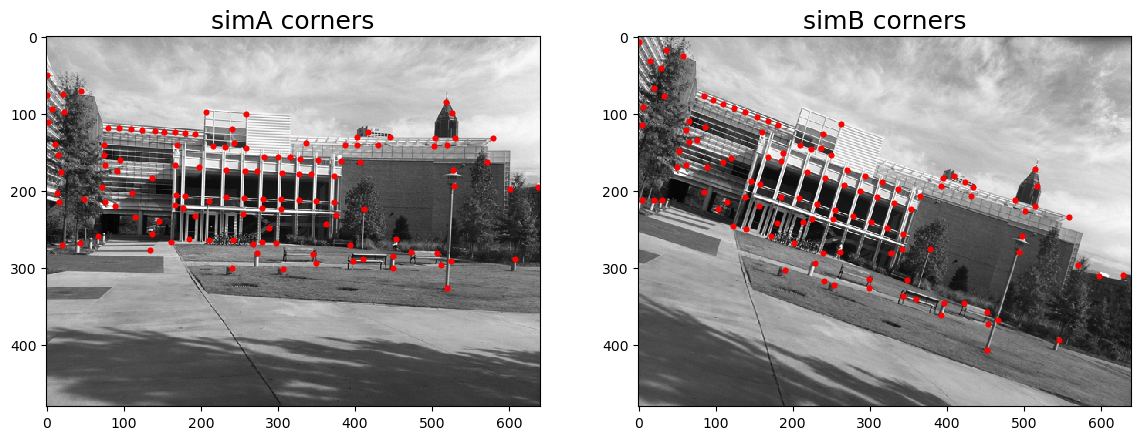

In [12]:
sim_A_hc = corners(sim_A_hv)
sim_B_hc = corners(sim_B_hv)

# Plot corners
fig, ax = plt.subplots(1, 2)
ax[0].imshow(sim_A)
ax[0].plot(sim_A_hc[1], sim_A_hc[0], 'r.')
ax[0].set_title('simA corners')

ax[1].imshow(sim_B)
ax[1].plot(sim_B_hc[1], sim_B_hc[0], 'r.')
ax[1].set_title('simB corners')


Based on the results, the similarity pair appears to perform better than the translation pair.<br/>
Nevertheless, certain points at the top of the building and corners in the shadow side cannot be detected in both cases. The reason is that the Harris values of these points are lower than others, as can be observed in part 1.2. Therefore, when the Harris values are utilized to detect corners, they are not detectable.

## 2.SIFT
### 2.1 The angle images

In [13]:
def corners_to_keypoints(img, corners):
    # Gradients
    grad_img_x = grad_x(img)
    grad_img_y = grad_y(img)
    # angle of gradients
    angles = np.arctan2(grad_img_y, grad_img_x)
    # replace NaN values with a default value (e.g., 0)
    angles = np.nan_to_num(angles)
    # convert angles from radians to degrees and ensure they are in the range [0, 360)
    angles = np.rad2deg(angles) % 360
    # average angles across color channels
    angles = np.mean(angles, axis=-1)

    # Create keypoints
    keypoints = [cv.KeyPoint(float(x), float(y), 1, angle=float(angles[y, x])) for y, x in zip(*corners[:2])]
    return keypoints

def plot_keypoints(ax, keypoints):

    def plot_angle(ax, x, y, angle, scale = 15):
        x2 = x + np.cos(angle) * scale
        y2 = y + np.sin(angle) * scale
        ax.plot([x, x2], [y, y2], 'r-')
        ax.plot(x, y, 'b.')
        return
    
    ax.set_xlim(ax.get_xlim())
    ax.set_ylim(ax.get_ylim())
    ax.axis('off')
    for k in keypoints:
        x, y = k.pt
        angle = k.angle
        plot_angle(ax, x, y, angle)
    return



#### a.Translation Pair

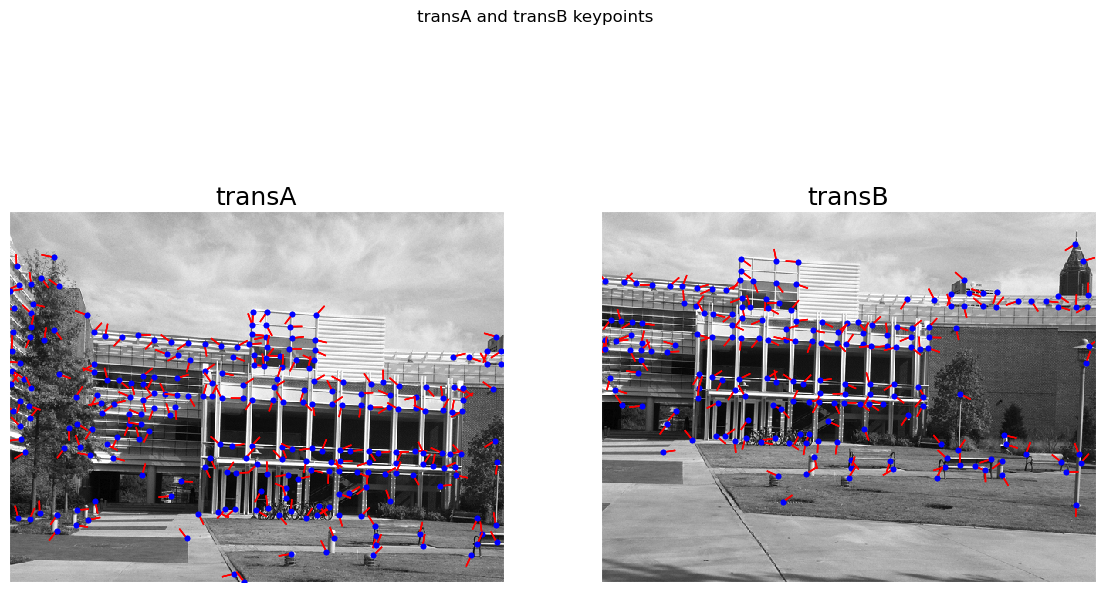

In [14]:
# plots
fig, ax = plt.subplots(1, 2)
fig.suptitle('transA and transB keypoints')
# transA
ax[0].imshow(trans_A)
ax[0].set_title('transA')
ax[0].axis('off')
# keypoints
trans_A_kp = corners_to_keypoints(trans_A, trans_A_hc)
plot_keypoints(ax[0], trans_A_kp)

# transB
ax[1].imshow(trans_B)
ax[1].set_title('transB')
ax[1].axis('off')
trans_B_kp = corners_to_keypoints(trans_B, trans_B_hc)
plot_keypoints(ax[1], trans_B_kp)


#### b. Sim pair

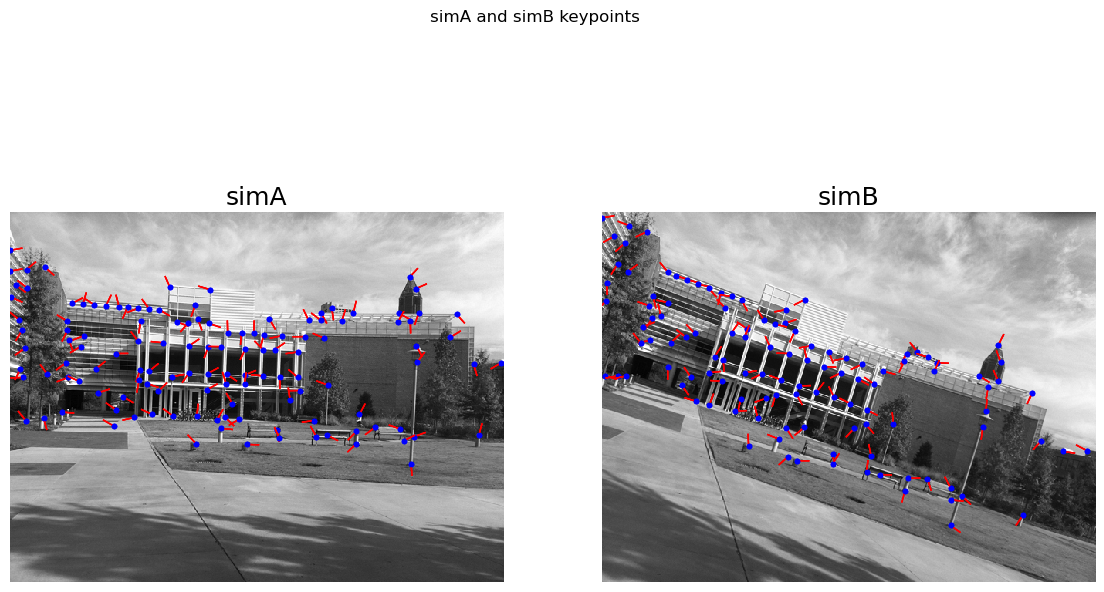

In [15]:
# plots
fig, ax = plt.subplots(1, 2)
fig.suptitle('simA and simB keypoints')
# simA
ax[0].imshow(sim_A)
ax[0].set_title('simA')
ax[0].axis('off')
# keypoints
sim_A_kp = corners_to_keypoints(sim_A, sim_A_hc)
plot_keypoints(ax[0], sim_A_kp)
#simB
ax[1].imshow(sim_B)
ax[1].set_title('simB')
ax[1].axis('off')
sim_B_kp = corners_to_keypoints(sim_B, sim_B_hc)
plot_keypoints(ax[1], sim_B_kp)


### 2.2 Draw the putative pair images

In [16]:
sift = cv.SIFT_create()
bf = cv.BFMatcher(cv.NORM_L2, crossCheck=True) 

In [17]:
def filter_matches(matches, ratio=0.95):
    match = []
    for m in matches:
        if m.distance < ratio*matches[0].distance:
            match.append(m)
    return match

def matcher_to_point(matches, keypointsA, keypointsB):
    '''
    Convert from OpenCV Matcher object (with indices) to list of point pairs.
    '''
    matches_tuple = []
    for m in matches:
        # Extract matching points
        ixA = m.queryIdx
        ixB = m.trainIdx
        xyA = np.array(keypointsA[ixA].pt)
        xyB = np.array(keypointsB[ixB].pt)
        matches_tuple.append((xyA, xyB))
    return matches_tuple

def draw_matches(ax1, ax2, matches):
    '''
    Draw matching correspondences across images.
    '''
    print('Number of matches: {:d}'.format(len(matches)))
    for m in matches:
        # Extract matching points
        xyA, xyB = m
        # Random colors for each matching line
        color = np.random.rand(3)
        ax1.plot(*xyA, marker='o', c=color, fillstyle='none')
        ax2.plot(*xyB, marker='o', c=color, fillstyle='none')
        con = ConnectionPatch(xyB, xyA, "data", "data", axesA=ax2, axesB=ax1, color=color)
        ax2.add_artist(con)
    return


#### a. Trans Pair

Number of matches: 62


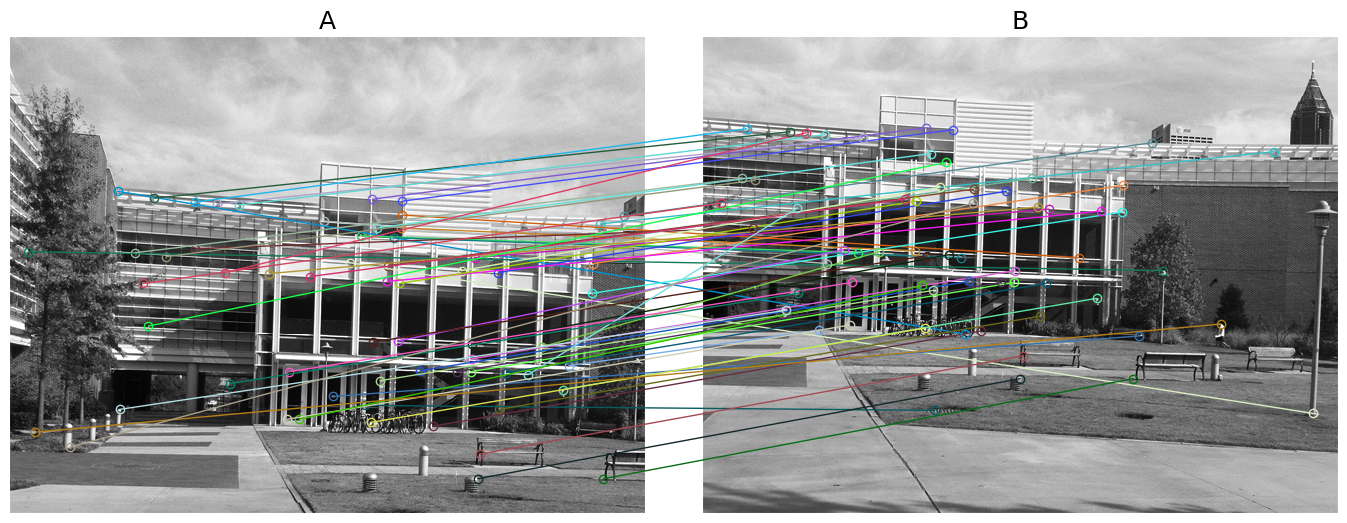

In [18]:
_, desA = sift.compute(transA, trans_A_kp)
_, desB = sift.compute(transB, trans_B_kp)
# Plots
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.tight_layout()
# Image 1
ax1.imshow(transA)
ax1.set_title('A')
ax1.axis('off')
# Image 2
ax2.imshow(transB)
ax2.set_title('B')
ax2.axis('off')
# Find two closes matches
trans_matches_cv = bf.match(desA, desB)

# Apply ratio test to filter
trans_matches_cv = filter_matches(trans_matches_cv)
trans_matches = matcher_to_point(trans_matches_cv, trans_A_kp, trans_B_kp)
draw_matches(ax1, ax2, trans_matches)



#### b.Sim pair

Number of matches: 41


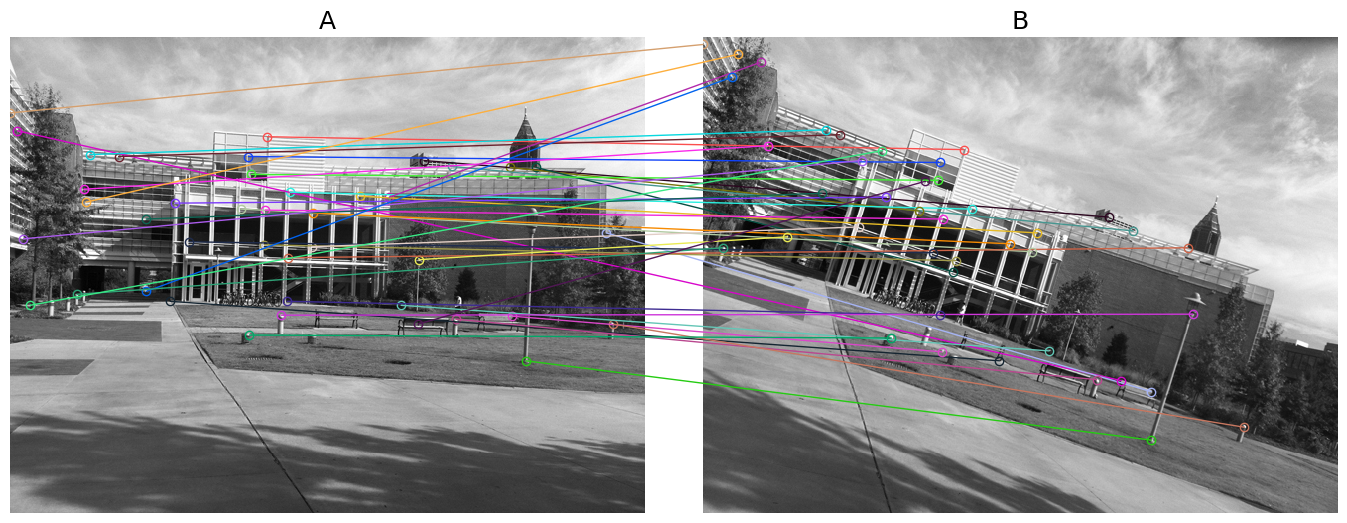

In [19]:
_, desA = sift.compute(simA, sim_A_kp)
_, desB = sift.compute(simB, sim_B_kp)
# Plots
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.tight_layout()
# Image 1
ax1.imshow(simA)
ax1.set_title('A')
ax1.axis('off')
# Image 2
ax2.imshow(simB)
ax2.set_title('B')
ax2.axis('off')
# Find two closes matches
sim_matches_cv = bf.match(desA, desB)

# Apply ratio test to filter
sim_matches_cv = filter_matches(sim_matches_cv)
sim_matches = matcher_to_point(sim_matches_cv, sim_A_kp, sim_B_kp)
draw_matches(ax1, ax2, sim_matches)


## 3.Ransac

In [20]:
# create Ransac
def ransac(matches, get_candicate, tolerance=100, num = 300):
    '''
    RANSAC algorithm for homography estimation.
    '''
    best_inliers = []
    for i in range(num):
        # Get candidate homography
        H = get_candicate(matches)
        # Get inliers
        inliers = []
        for m in matches:
            # Extract matching points
            xyA, xyB = m
            # Transform xyB
            xyB_hat = H @ np.append(xyB, 1)
            xyB_hat = xyB_hat / xyB_hat[-1]
            # Calculate distance
            dist = np.linalg.norm(xyA - xyB_hat[:2])
            # Check if distance is within tolerance
            if dist < tolerance:
                inliers.append(m)
        # Check if we have a new best homography
        if len(inliers) > len(best_inliers):
            best_inliers = inliers
            
    return best_inliers

## a Translation Pair

In [21]:
#create translation matrix
def translation_candidate(matches):
    '''
    Get a candidate homography for translation.
    '''
    # Get matching points
    xyA, xyB = zip(*matches)
    xyA = np.array(xyA)
    xyB = np.array(xyB)
    # Calculate translation
    t = np.mean(xyA - xyB, axis=0)
    # Create homography
    H = np.array([[1, 0, t[0]], [0, 1, t[1]], [0, 0, 1]])
    return H

In [22]:
#ceate fit translation
def fit_translation(matches):
    '''Calculate mean translation vector'''
    xyA, xyB = zip(*matches)
    xyA = np.array(xyA)
    xyB = np.array(xyB)
    t = np.mean(xyA - xyB, axis=0)
    return t

Translation vector: [130.14  71.16]
Number of consistent matches: 50
Percentage of consisitent matches: 80.65%
Number of matches: 50


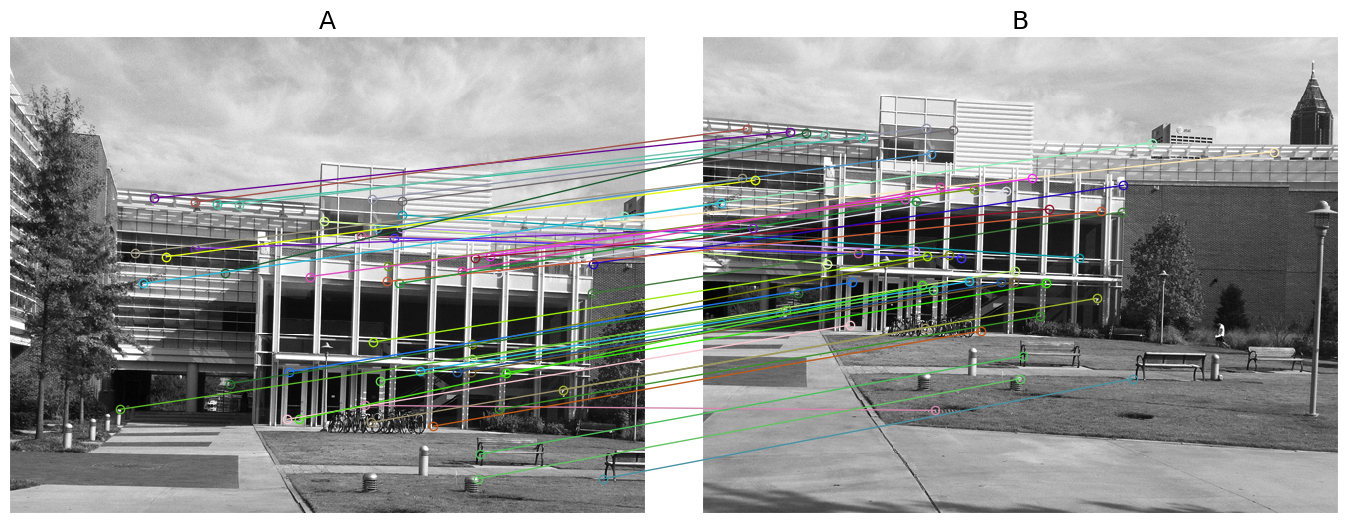

In [32]:
#perform ransac and plot
consistent_matches = ransac(trans_matches, translation_candidate, tolerance=150, num=500)
T = fit_translation(consistent_matches)
print('Translation vector: {:s}'.format(str(T)))
print('Number of consistent matches: {:d}'.format(len(consistent_matches)))
print('Percentage of consisitent matches: {:.2f}%'.format(100* len(consistent_matches)/ len(trans_matches)))

# Plot
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.tight_layout()
# Image 1
ax1.imshow(transA)
ax1.set_title('A')
ax1.axis('off')
# Image 2
ax2.imshow(transB)  
ax2.set_title('B')
ax2.axis('off')
# Draw matches
draw_matches(ax1, ax2, consistent_matches)


#### b. Similarity Pair

In [36]:
# create similarity matrix
def similarity_candidate(matches):
    '''
    Get transformation matrix associated with a similarity transformation 
    by sampling two random matching pairs of points.
    '''
    # Two random matching pairs
    m1, m2 = random.sample(matches, 2)
    # Extract matching points
    (x1A, y1A), (x1B, y1B) = m1
    (x2A, y2A), (x2B, y2B) = m2
    # Solve for similarity transformation
    ## Solve Ax = b
    A = np.array([[x1A, -y1A, 1, 0],
                  [y1A,  x1A, 0, 1],
                  [x2A, -y2A, 1, 0],
                  [y2A,  x2A, 0, 1]])
    b = np.array([x1B, y1B, x2B, y2B])
    x = np.linalg.solve(A, b)
    ## Reshape
    T = np.array([[x[0], -x[1], x[2]],
                  [x[1],  x[0], x[3]]])
    return T

def fit_similarity(matches):
    '''Calculate the best similarity transformation along with 
    the inlier matches using ordinary least squares.'''
    # calculate top matches into linear equation
    A = []
    b = []
    for m in matches:
        # Extract matching points
        xyA, xyB = m
        # Create linear equation
        A.append([xyB[0], -xyB[1], 1, 0])
        A.append([xyB[1], xyB[0], 0, 1])
        b.append(xyA[0])
        b.append(xyA[1])
    # Solve linear equation

    x = np.linalg.lstsq(A, b, rcond=None)[0]
    # Create similarity matrix
    H = np.array([[x[0], -x[1], x[2]], [x[1], x[0], x[3]]])
    
    return H


Similarity matrix: [[ 3.39320942e-01  5.56203926e-02  1.05575211e+02]
 [-5.56203926e-02  3.39320942e-01  1.40113929e+02]]
Number of consistent matches: 29
Percentage of consisitent matches: 70.73%
Number of matches: 29


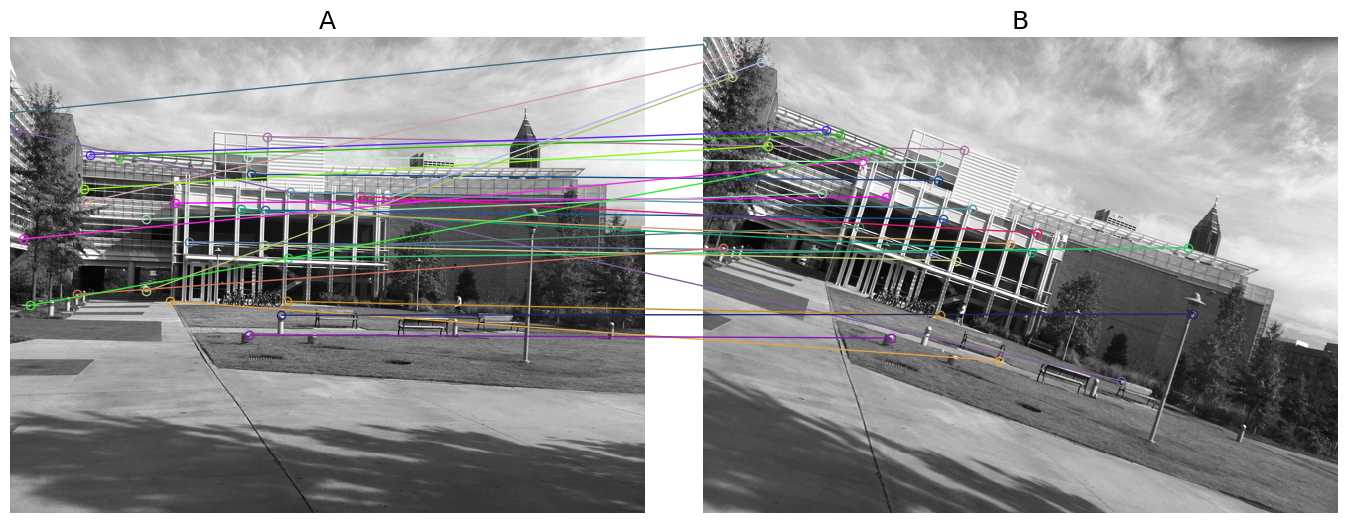

In [37]:
consistent_matches = ransac(sim_matches, similarity_candidate, tolerance=400, num=500)
S = fit_similarity(consistent_matches)
print('Similarity matrix: {:s}'.format(str(S)))
print('Number of consistent matches: {:d}'.format(len(consistent_matches)))
print('Percentage of consisitent matches: {:.2f}%'.format(100* len(consistent_matches)/ len(sim_matches)))

# Plot
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.tight_layout()
# Image 1
ax1.imshow(simA)
ax1.set_title('A')
ax1.axis('off')
# Image 2
ax2.imshow(simB)
ax2.set_title('B')
ax2.axis('off')
# Draw matches
draw_matches(ax1, ax2, consistent_matches)
